
# Ad-Click

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Get the Data

In [3]:
ad_data = pd.read_csv('advertising.csv')

In [4]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

Is there any duplicated or missing data in our dataset?

In [7]:
ad_data.duplicated().sum()

0

In [7]:
ad_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

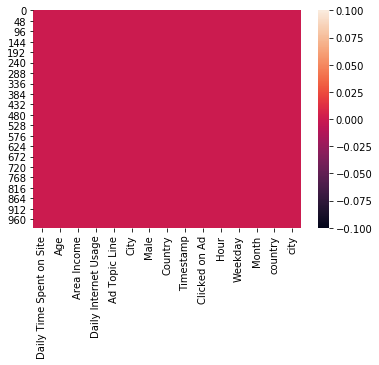

In [53]:
sns.heatmap(ad_data.isna())

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Now let's see countries that are featuring in our data:

In [11]:
pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad  0  1
Country            
Australia      1  7
Turkey         1  7
Ethiopia       0  7
Liberia        2  6
South Africa   2  6
Liechtenstein  0  6
Senegal        3  5
Peru           3  5
Mayotte        1  5
Hungary        1  5

In [9]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0           count
Country              
France              9
Czech Republic      9
Afghanistan         8
Australia           8
Turkey              8
South Africa        8
Senegal             8
Peru                8
Micronesia          8
Greece              8

Let's visualize the target variable!

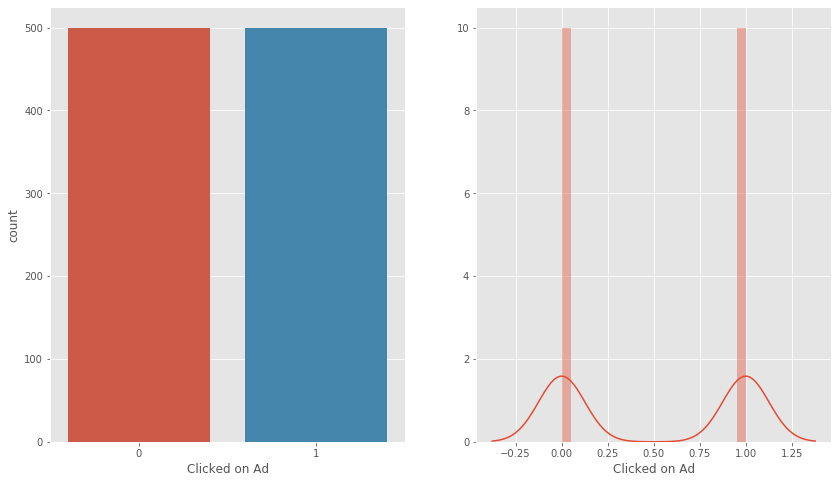

In [14]:
plt.figure(figsize = (14, 8)) 
plt.style.use('ggplot')
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = ad_data)
plt.subplot(1,2,2)
sns.distplot(ad_data["Clicked on Ad"], bins = 20)

We could see that the user that clicked and not clicked the ad is in the same proportion. How about the age distribution in our data?

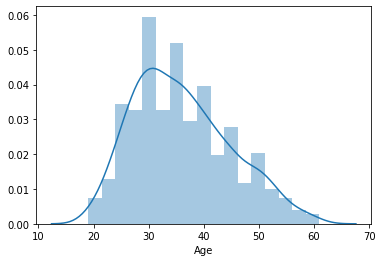

In [6]:
sns.distplot(ad_data['Age'])

The age distributes on 30-40. Then we create a jointplot showing Area Income versus Age.

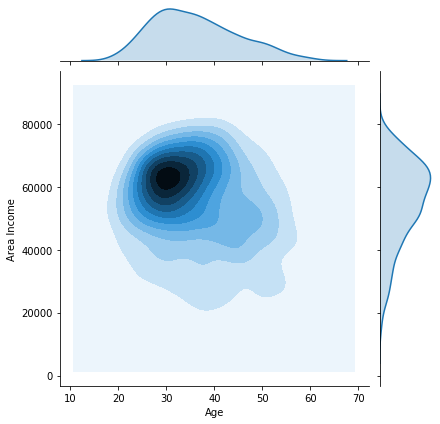

In [8]:
sns.jointplot(x='Age', y='Area Income',data=ad_data,kind='kde')

People aged between 30 - 40 mostly have area income between 60000 - 80000.

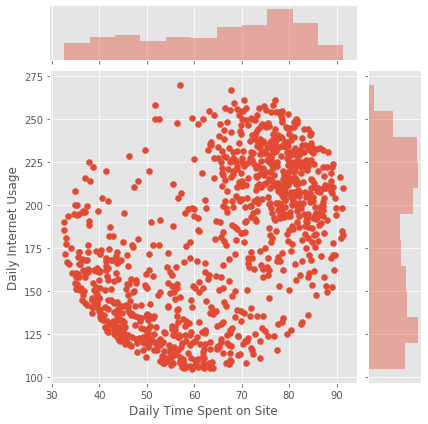

In [17]:
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', ad_data)

Not suprisingly, people that spent more on a site are the one that used internet extensively and vice versa.

Finally, we create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

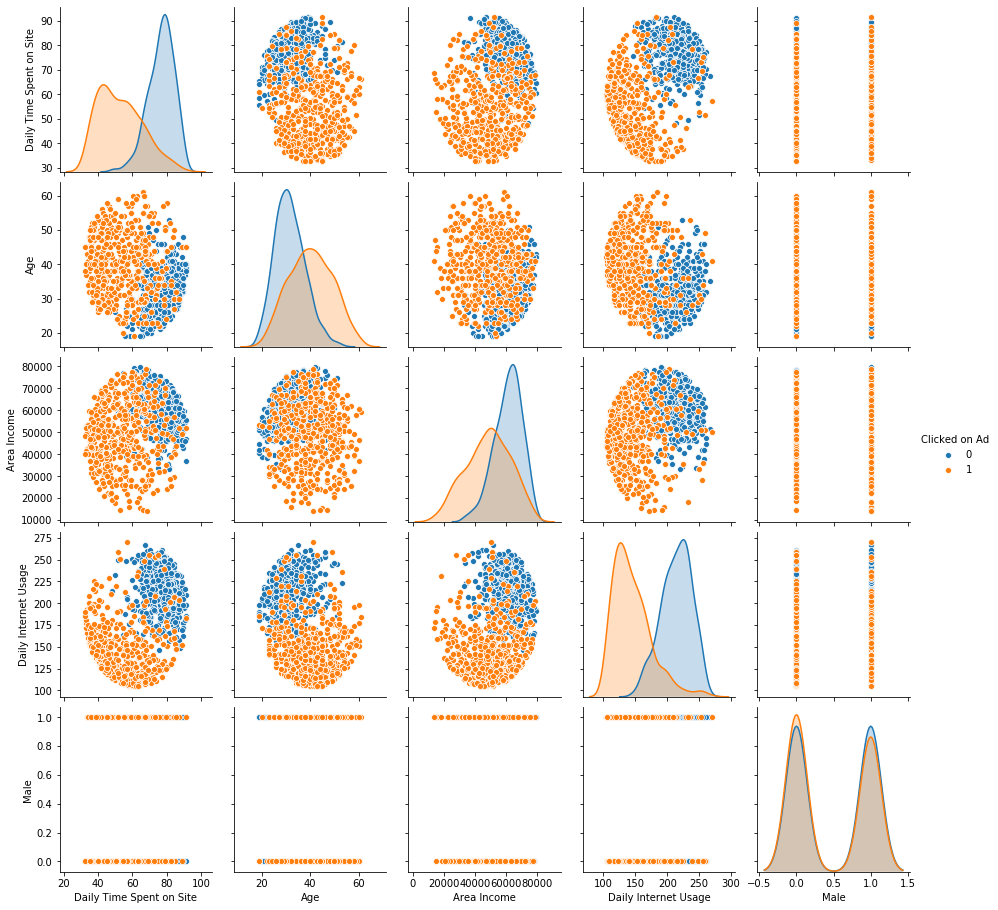

In [19]:
sns.pairplot(ad_data, hue='Clicked on Ad')

This pairplot explains the relationship between our target variable and explanatory variables. People with less income and spend less time on internet tend to click an ad. Now, let's explore more with some variables:

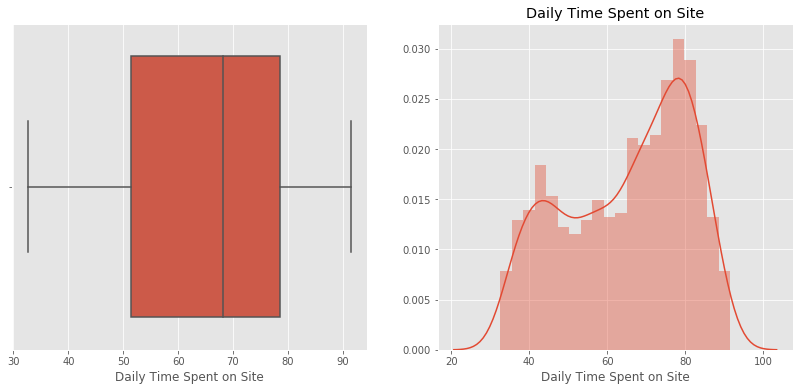

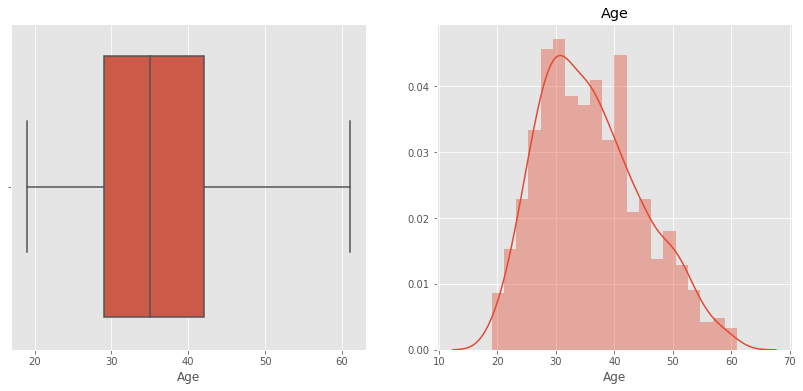

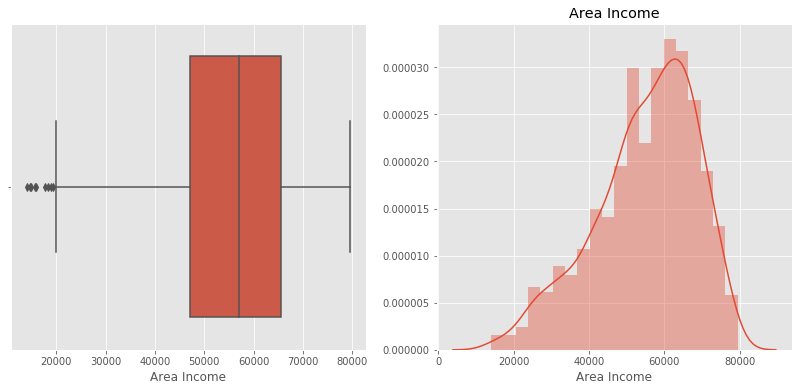

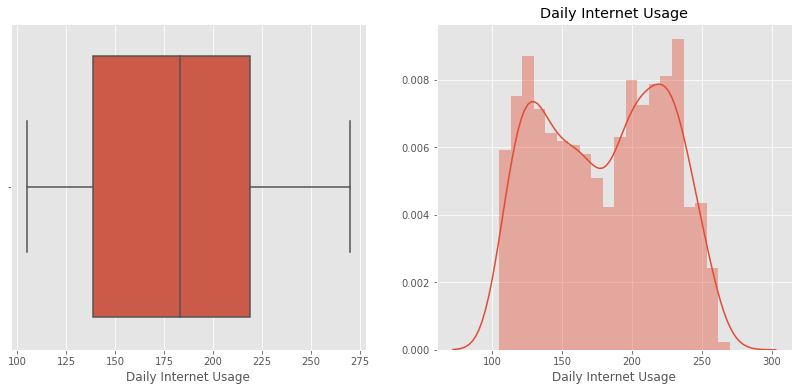

In [20]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(ad_data[i])
    plt.subplot(1,2,2)
    sns.distplot(ad_data[i],bins= 20)    
    plt.title(i)    
    plt.show()

From the graph above, we could see that daily internet usage and daily time spent on site has two peaks which indicate that there are two different group on that data.

## Feature Engineering
In this section, we change object variables into numerical so that it can be used by our model

### Time
We divided the time variable into three different variables: Hour, Day and Month.

In [23]:
ad_data['Timestamp'] = ad_data['Timestamp'].astype('datetime64')

In [24]:
ad_data['Hour'] = ad_data['Timestamp'].dt.hour 
ad_data['Weekday'] = ad_data['Timestamp'].dt.dayofweek
ad_data['Month'] = ad_data['Timestamp'].dt.month

Now, let's see the relationship between those time variable with other variables!

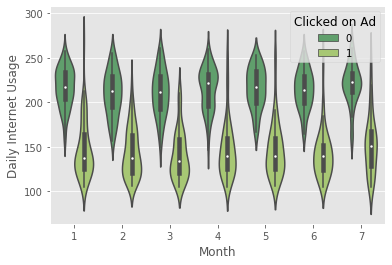

In [29]:
sns.violinplot('Month', 'Daily Internet Usage',hue='Clicked on Ad', data=ad_data, palette='summer')

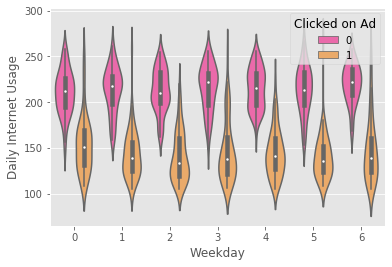

In [30]:
sns.violinplot('Weekday', 'Daily Internet Usage',hue='Clicked on Ad', data=ad_data, palette='spring')

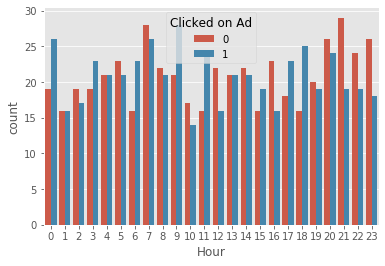

In [31]:
sns.countplot('Hour',hue='Clicked on Ad', data=ad_data)

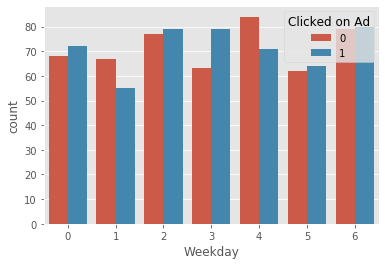

In [32]:
sns.countplot('Weekday',hue='Clicked on Ad', data=ad_data)

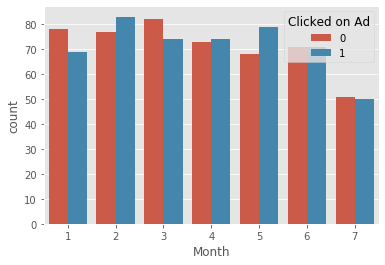

In [33]:
sns.countplot('Month',hue='Clicked on Ad', data=ad_data)

We could see that there are no significant influences that the time variable could bring, so that this variables need to be pair with other variables to be significant in our model.

### Country

Then we change country variable into category and into numerical data types:

In [29]:
ad_data['Country'].nunique()

237

In [43]:
ad_data['country'] = ad_data['Country'].astype('category').cat.codes

In [42]:
ad_data['country'].nunique()

237

In [46]:
ad_data['country'].dtypes

dtype('int16')

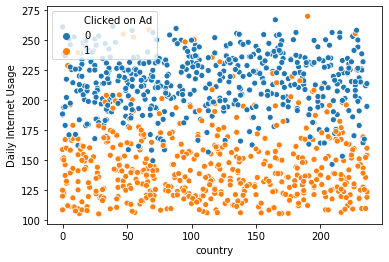

In [76]:
sns.scatterplot('country', 'Daily Internet Usage',hue='Clicked on Ad', data=ad_data)


### City
We change city column into numerical one:

In [47]:
ad_data['City'].nunique()

969

In [48]:
ad_data['city'] = ad_data['City'].astype('category').cat.codes

In [49]:
ad_data['city'].nunique()

969

In [50]:
ad_data['city'].dtypes


dtype('int16')

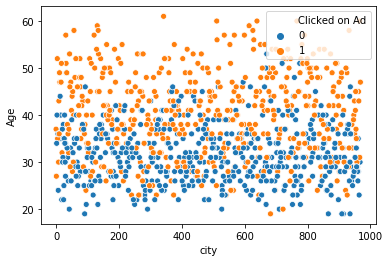

In [74]:
sns.scatterplot('city', 'Age',hue='Clicked on Ad', data=ad_data)

In [54]:
ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   category      
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
 11  Weekday                   1000 non-null   int64         
 12  Month                

In [77]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1, inplace=True)

In [78]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Hour                      1000 non-null   int64  
 7   Weekday                   1000 non-null   int64  
 8   Month                     1000 non-null   int64  
 9   country                   1000 non-null   int16  
 10  city                      1000 non-null   int16  
dtypes: float64(3), int16(2), int64(6)
memory usage: 74.3 KB


# Logistic Regression

Now it's time to do a train test split, and train our model!

** We split the data into training set and testing set using train_test_split**

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad', axis = 1), ad_data['Clicked on Ad'], test_size = 0.3)

** Train and fit a logistic regression model on the training set.**

In [84]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [85]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now we predict values for the testing data.**

In [88]:
predictions = log.predict(X_test)

** Then we create a classification report for the model.**

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.92      0.94      0.93       154
           1       0.93      0.92      0.92       146

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Conclusion
We got an accuracy for more than 90 percent!!
